# chi-squared distribution

ref1: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2

ref2: https://www.scribbr.com/statistics/chi-square-distributions/#What%20Is%20A%20Chi-Square%20Distribution?



## What is a chi-square distribution?

Chi-square (or Chi-squared) ($\chi^2$) distributions are a family of continuous probability distributions. They’re widely used in hypothesis tests, including the chi-square goodness of fit test and the chi-square test of independence.

The shape of a chi-square distribution is determined by the parameter k, which represents the degrees of freedom.

Very few real-world observations follow a chi-square distribution. The main purpose of chi-square distributions is hypothesis testing, not describing real-world distributions.

In contrast, most other widely used distributions, like normal distributions or Poisson distributions, can describe useful things such as newborns’ birth weights or disease cases per year, respectively.

## Definition

The probability density function for chi2 is:
$$f(x,k) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1} exp(-x/2)$$
for $x>0$  and $k>0$  (degrees of freedom, denoted df in the implementation).

chi2 takes df (i.e, k in the above formula) as a shape parameter.

The chi-squared distribution is a special case of the gamma distribution, with gamma parameters a = df/2, loc = 0 and scale = 2.

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, chi2.pdf(x, df, loc, scale) is identically equivalent to chi2.pdf(y, df) / scale with y = (x - loc) / scale. Note that shifting the location of a distribution does not make it a “noncentral” distribution; noncentral generalizations of some distributions are available in separate classes.

## DIY implementation of chi-squared pdf

In [1]:
import numpy as np
#import scipy
from scipy.special import gamma
from matplotlib import pyplot as plt

In [2]:
def chi_squared(x, k):

    c = 1 / (2 ** (k/2)) / gamma(k/2)
    y = c * (x ** (k/2 - 1)) * np.exp(-x /2)

    return y, np.mean(y), np.std(y)


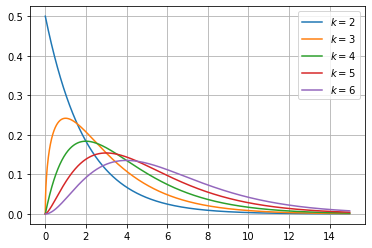

In [3]:
for k in range(2,7):
    x = np.arange(0, 15, 0.01, dtype=float)
    y, y_mean, y_std = chi_squared(x, k)
    plt.plot(x, y, label=r'$k=%d$' % (k))
plt.legend()
plt.savefig('graph/chi-squared.png')
plt.grid()
plt.show()


## Call scipy.stats.chi2 directly to get chi2 pdf

In [4]:
from scipy.stats import chi2

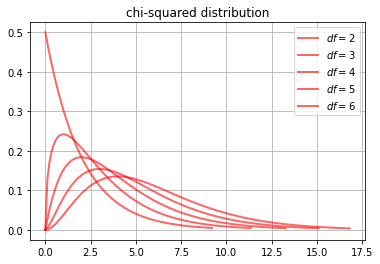

In [5]:
fig, ax = plt.subplots(1, 1)
for df in range(2,7): # "df" represents degree-of-freedom, i.e, k in the above formula.
    #x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
    x = np.linspace(0, chi2.ppf(0.99, df), 100)

    # ax.plot(x, chi2.pdf(x, df),'r-', lw=2, alpha=0.6, label='chi2 pdf')
    ax.plot(x, chi2.pdf(x, df),'r-', lw=2, alpha=0.6, label=r'$df=%d$' % (df))
ax.set_title('chi-squared distribution')  
ax.legend()    
ax.grid()    

## Sampling to generate chi-squared distribution samples

In [6]:
from scipy.stats import norm

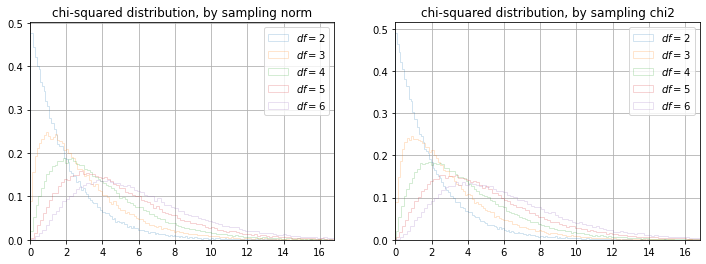

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
N    = 100000
X0   = norm.rvs(0, size=N)
Y    = X0 * X0

for df in range(2,7): 
    X     = norm.rvs(0, size=N)
    Y     = X * X + Y
    #ax.hist(Y, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
    ax[0].hist(Y, density=True, bins='auto', histtype='step', alpha=0.2, label=r'$df=%d$' % (df)) #supported values are 'bar', 'barstacked', 'step', 'stepfilled'

    chi2_samples = chi2.rvs(df,size=N)
    ax[1].hist(chi2_samples, density=True, bins='auto', histtype='step', alpha=0.2, label=r'$df=%d$' % (df)) #supported values are 'bar', 'barstacked', 'step', 'stepfilled'
    
    
ax[0].set_xlim([x[0], x[-1]])
ax[0].legend(loc='best', frameon=False)
ax[0].set_title('chi-squared distribution, by sampling norm')  
ax[0].legend()    
ax[0].grid()    

ax[1].set_xlim([x[0], x[-1]])
ax[1].legend(loc='best', frameon=False)
ax[1].set_title('chi-squared distribution, by sampling chi2')  
ax[1].legend()    
ax[1].grid()    
plt.show()

## Calculate the first four moments

In [8]:
for df in range(2,20,3):
    mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
    print('(mean, var, skew, kurt) = {0:8.3f},{1:8.3f},{2:8.3f},{3:8.3f}'.format( mean, var, skew, kurt))

(mean, var, skew, kurt) =    2.000,   4.000,   2.000,   6.000
(mean, var, skew, kurt) =    5.000,  10.000,   1.265,   2.400
(mean, var, skew, kurt) =    8.000,  16.000,   1.000,   1.500
(mean, var, skew, kurt) =   11.000,  22.000,   0.853,   1.091
(mean, var, skew, kurt) =   14.000,  28.000,   0.756,   0.857
(mean, var, skew, kurt) =   17.000,  34.000,   0.686,   0.706


## Chi-square test statistics

## Example applications of chi-square distributions
The chi-square distribution makes an appearance in many statistical tests and theories. The following are a few of the most common applications of the chi-square distribution.

### Pearson’s chi-square test
One of the most common applications of chi-square distributions is Pearson’s chi-square tests. Pearson’s chi-square tests are statistical tests for categorical data. They’re used to determine whether your data are significantly different from what you expected. There are two types of Pearson’s chi-square tests:

Chi-square goodness of fit test
Chi-square test of independence

### Population variance inferences

The chi-square distribution can also be used to make inferences about a population’s variance (σ²) or standard deviation (σ). Using the chi-square distribution, you can test the hypothesis that a population variance is equal to a certain value using the test of a single variance or calculate confidence intervals for a population’s variance.

### F distribution definition
Chi-square distributions are important in defining the F distribution, which is used in ANOVAs.

Imagine you take random samples from a chi-square distribution, and then divide the sample by the k of the distribution. Next, you repeat the process with a different chi-square distribution. If you take the ratios of the values from the two distributions, you will have an F distribution.

# The non-central chi-square distribution
The non-central chi-square distribution is a more general version of the chi-square distribution. It’s used in some types of power analyses.

The non-central chi-square distribution has an extra parameter called λ (lambda) or the non-central parameter. This parameter changes the shape of the distribution, shifting the peak to the right and increasing the variance as λ increases.